# 3.4.4 - DBSCAN - Density Based Spatial Clustering of Applications with Noise


* En este Notebook vamos a ver el Algoritmo del ***DBSCAN*** (Density Based Spatial Clustering of Applications with Noise), que es un ***Algoritmo de Aprendizaje no Supervisado para Clustering***. Vamos a ***resolver un problema de Clusterización usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [DBSCAN](#M1)
<span></span><br>
    2. [Ejemplo sencillo de Clustering con DBSCAN](#M2)
    

<hr>



## <a name="M1">1. Clustering Jerárquico</a>


* ***Density Based Spatial Clustering of Applications with Noise (DBSAN)*** en Castellano Agrupamiento Espacial Basado en Densidad de ***Aplicaciones con Ruido es un Algoritmo de Aprendizaje para Clustering basado en Densidades***.


* DBSCAN, a diferencia de otros Algoritmos de Clustering como el K-Means o el Gaussian Mixture Models no necesita saber a priori cuantos Clusters se desean formar; solo necesita saber ***2 hiperparámetros*** que son:
<span></span><br><br>
    + ***$\in$***: Este hiperparámetro define un umbral de similaridad.
<span></span><br><br>   
    + ***$n$***: Este hiperparámetro define un umbral de elementos.
    
* ***DBSCAN comienza eligiendo un elemento al azar y calcula la similaridad (o distancia) con el resto de elementos***. A continuación ***selecciona los elementos que tienen una similaridad inferior a $\in$ y forma un grupo de elementos. Si ese grupo de elementos es superior a $n$, entonces todo esos $\in-vecinos$ formaran un cluster***. ***Esta operación se repite con todos los elementos del cluster*** y el cluster irá aumentando hasta que ya no encuentre más elementos con similaridad inferior a $\in$.


* Posteriormente, si quedan elementos se vuelve a seleccionar otro elemento al azar y se siguen formando grupos de la misma manera.


* ***Aquellos elementos que no consigan formar grupos debido a que no tengan $n$ elementos con una similaridad inferior a $\in$ no formarán un Cluster y serán denominados "Outlayers".***


* Veamos a continuación un ejemplo de como formaríamos Clusters dado el siguiente conjunto de elementos:


<img src="../../imgs/3_04_04_01_dbscan.png" style="width: 300px;"/>


* Una vez definidos los hiperparámetros, seleccionamos un elemento al azar:

<img src="../../imgs/3_04_04_02_dbscan.png" style="width: 450px;"/>


* Calculamos la similaridad (para este ejemplo será la distancia euclidea).

<img src="../../imgs/3_04_04_03_dbscan.png" style="width: 450px;"/>


*  Formamos un nuevo grupo con los elementos que tengan una similadidad inferior a $\in$.

<img src="../../imgs/3_04_04_04_dbscan.png" style="width: 450px;"/>


* Volvemos a realizar la misma operación con todos los elementos del nuevo grupo formado:

<img src="../../imgs/3_04_04_05_dbscan.png" style="width: 450px;"/>


* Iteramos hasta conseguir un Cluster a partir del cual no tengamos más elementos con una similaridad inferior a $\in$:

<img src="../../imgs/3_04_04_06_dbscan.png" style="width: 450px;"/>


* Volvemos a seleccionar otro elemento al azar:

<img src="../../imgs/3_04_04_07_dbscan.png" style="width: 450px;"/>


* Calculamos la similaridad con el resto de elementos y seleccionamos los que tengan na similaridad inferior a $\in$:

<img src="../../imgs/3_04_04_08_dbscan.png" style="width: 450px;"/>


* Formamos un nuevo Cluster:

<img src="../../imgs/3_04_04_09_dbscan.png" style="width: 450px;"/>

* Seleccionamos el elemento que nos queda:

<img src="../../imgs/3_04_04_10_dbscan.png" style="width: 450px;"/>

* En este caso vemos que no tiene elementos cuya similaridad sean inferior a $\in$ y por tanto no puede formar un grupo superior a $n=3$ elementos; por tanto ese elemento se considera un Outlayer:

<img src="../../imgs/3_04_04_11_dbscan.png" style="width: 450px;"/>


* El resultado final de la Clusterización con DBSCAN sería el siguiente:

<img src="../../imgs/3_04_04_12_dbscan.png" style="width: 450px;"/>


<hr>

## <a name="M2">2. Ejemplo sencillo de Clustering con DBSCAN</a>


* Para resolver un problema de Clustering con DBSCAN vamos a utilizar la clase **"DBSCAN()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


* Vamos a utilizar tambien el K-Means para ver las diferencias entre el DBSCAN con otro Algoritmo de Aprendizaje para Clustering:


* Este ejemplo los vamos a resolver con dos conjuntos de datos que son los siguientes:

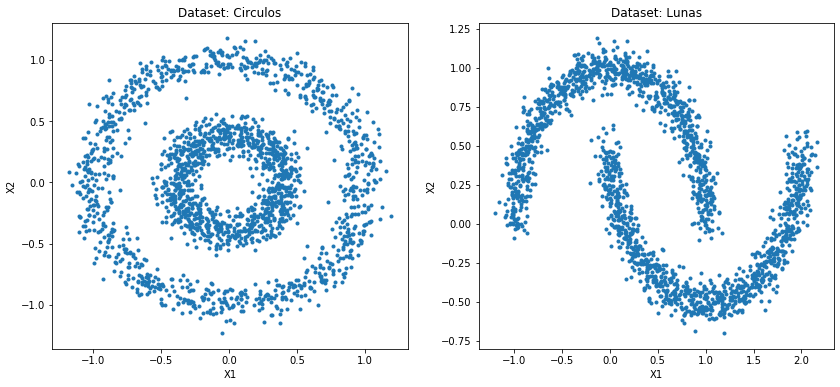

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn import datasets
from sklearn.cluster import DBSCAN, KMeans
np.random.seed(0)

n_samples = 2000
X_data = {
    'Circulos': datasets.make_circles(n_samples=n_samples, factor=.4, noise=.08)[0],
    'Lunas': datasets.make_moons(n_samples=n_samples, noise=.07)[0]
}


# Pintamos los conjuntos de datos
plt.figure(figsize=(14, 6))
i=0
for k, v in X_data.items():
    plt.subplot(1, 2, i+1)
    plt.scatter(v[:,0], v[:,1], marker='.')
    plt.title('Dataset: {}'.format(k))
    plt.xlabel('X1')
    plt.ylabel('X2')
    i +=1
plt.show()

* Podemos observar en ambos conjuntos de datos parace intuitivo que hay dos clusters bien diferenciados.


* Vamos a continuación a crear los modelos usando el K-Means y el DBSCAN para ambos Datasets:


* Para el caso del DBSCAN utilizaremos como medida de similaridad la distancia euclidea y definiremos como hiperparámetros:
<span></span><br><br>
    + $\in = 0.1$
<span></span><br><br>   
    + $n = 5$

In [2]:
kmeans_cir = KMeans(n_clusters=2, random_state=0)
kmeans_lu = KMeans(n_clusters=2, random_state=0)
dbscan_cir = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
dbscan_lu = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')

clasificadores = [{'name': 'K-Means - Circulos', 'model': kmeans_cir, 'data': X_data['Circulos']},
                 {'name': 'K-Means - Lunas', 'model': kmeans_lu, 'data': X_data['Lunas']},
                 {'name': 'DBSCAN - Circulos', 'model': dbscan_cir, 'data': X_data['Circulos']},
                 {'name': 'DBSCAN - Lunas', 'model': dbscan_lu, 'data': X_data['Lunas']}]

# Ajustamos los modelos para ca
for clas in clasificadores:
    print ('CREANDO MODELO: {mod}'.format(mod=clas['name']))
    clas['model'].fit(clas['data'])
    

CREANDO MODELO: K-Means - Circulos
CREANDO MODELO: K-Means - Lunas
CREANDO MODELO: DBSCAN - Circulos
CREANDO MODELO: DBSCAN - Lunas


* A continuación vamos a representar los Clusters formados por ambos modelos y Datasets

[]

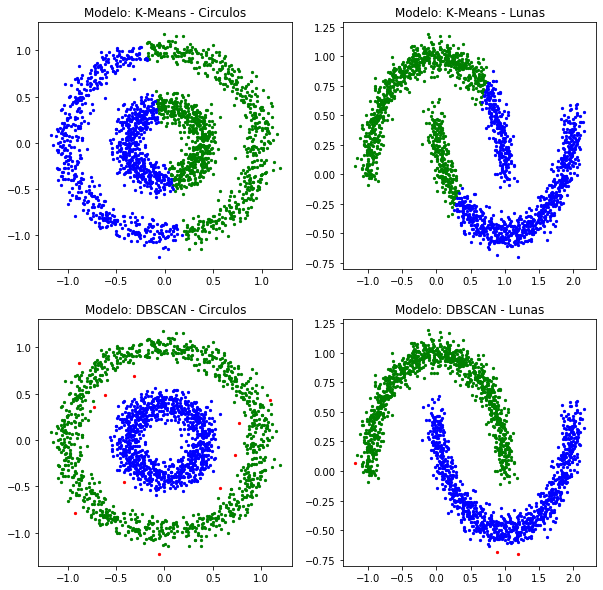

In [3]:
COLORS = ['green', 'blue', 'red']
# Creamos la gráfica

plt.figure(figsize=(10, 10))
i=0
for clas in clasificadores:
    plt.subplot(2, 2, i+1)
    labels = clas['model'].labels_
    clusters = np.unique(labels)
    for cluster in clusters:
        plt.scatter(clas['data'][labels == cluster, 0], 
                    clas['data'][labels == cluster, 1], 
                    color=COLORS[cluster], marker='o', s=5)
    plt.title('Modelo: {}'.format(clas['name']))
    i+=1 
plt.plot()

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">